In [1]:
#import tweepy and add our own authentication info
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
#Add my own authentication info
consumer_key="WraYL80IWfQ5F1IN9A85LV1rq"
consumer_secret="yDATyXlaGFB2AGbHhkc8afAQBfDarXNyWqlY4wjOoKOkdj9joF"
access_token="427308735-hhIqFaBP0jNCvvhtzNyTZjVJGxfnEaPi91a2QObq"
access_token_secret="AQeZUeUxNLkjwB1tvIUQXBJfbAEEsuer8KIhJfs8QIO66"

In [3]:
#Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#setting your access token and secret
auth.set_access_token(access_token,access_token_secret)

#Creating the API object while passing in auth information
api=tweepy.API(auth)

In [4]:
# Using the API object to get tweets from your timeline, and storing it in a variable called public_tweets
public_tweets=api.home_timeline()

## for each through all tweets pulled
for tweet in public_tweets:
    
    # printing the text stored inside the tweet object
    print (tweet.text)

RT @roanbirgen: Diversion from #FuelHike ishaiva...Tuju ametoa jikoni sasa iko mezani.

Karibuni. https://t.co/sOlCitU5c8
RT @wholetruthy: #Covid_19 Have you noticed this is the outline of every script in #Hollywood today 1) Nazi villain 2) Commie hero 3) Oppre…
RT @chuckwoolery: According to MSM poll, 46% of Republicans refuse to take Covid shot. Add super spreader to that claim of domestic terrori…
RT @TapasCielo: The Great luxury Brands Bottle offers all day.
Bring back the good time's 🥂

#ciroc #johnniewalker #singlemalt #singleton #…
RT @johnnjenga: Punishing Kenyan citizens

#UhuruMalizaUende https://t.co/AojUy4rYuV
RT @GregoryRogers7: This will bring the low wage , working people trying to survive to their knees. Specifically designed to remove them fr…
RT @TheScore01: So Super Freddie Lampard is in the world. 

In 2041 he’ll be breaking into the Chelsea first team, by then managed by Chels…
RT @EliseStefanik: Only in NY do the Albany Democrats get a &gt;$12B taxpayer funded fed

In [5]:
#Query the date the tweet was created
print (tweet.created_at)

2021-03-16 00:26:59


In [6]:
#Query the “name” and “location” attribute of the tweeter
print (tweet.user.screen_name)

Steph98706


In [7]:
print (tweet.user.location)

In [8]:
# Creating the API object while passing in auth information
api=tweepy.API(auth)

# The Twitter user who we want to get tweets from 
name = "MarthaKarua"

#No. of tweets to pull
tweetCount=100

# Calling the user_timeline function with our parameters
results=api.user_timeline(id=name,count=tweetCount)

for tweet in results:
    print (tweet.text)

RT @Reuters: mRNA vaccines spur lymph nodes for longer-term protection; COVID-19 test accuracy may vary by time of day https://t.co/WqhgwFe…
RT @alykhansatchu: ''Africa's Youth's Future is not in America and Europe Its in Africa'' says @akin_adesina @AfDB_Group #2021AEO
https://t…
RT @NationAfrica: The five women watching over Kenya’s public purse https://t.co/XiIRGFw6iw
RT @CapitalFMKenya: Kenyans online slam publicity-seeking MPs for shedding crocodile tears over fuel prices https://t.co/SMUfVlxCtr
RT @wmnjoya: "But for many of us around the world, the insidious work of empire lives on in the draconian education systems, the artifacts…
RT @bonifacemwangi: Murder most foul. A state witness murdered. In February, l met a young man who is to testify against a governor’s murde…
Over to you @ODPP_KE https://t.co/huxDcSltR9
RT @AJEnglish: Kremlin critic Alexey Navalny says he was locked up in a “real concentration camp” https://t.co/ED00LKWFB1 https://t.co/p1Ie…
Hear ye @MOH_Kenya @mutahik

In [9]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query="BBI"

#Language code (follows ISO 639-1 standards
language="en"

# Calling the user_timeline function with our parameters
results=api.search(q=query,lang=language)

for tweet in results:
    print (tweet.user.screen_name,"Tweeted:",tweet.text)

emmanuelkimtai8 Tweeted: RT @ochegoken: You cannot promote #BBI &amp; be against high fuel prices. #BBI is the main cause of higher taxes. #BBI will make the cost of li…
philblesd Tweeted: RT @KenyanMutwiri: A trailer of life after BBI , just a KIONJO, it is 122.81 in Nairobi na bado, we dont hv a PM, DPMs. All of them haven't…
choosetzuyu Tweeted: RT @cryptos_promo: I"II Give $250 One Random Person 
Next 7 Day

Just Retweet + Follow Me 

Like &amp; Retweet My pinned Comment
#BTc #BBI #ETH…
Brightalhelies Tweeted: RT @cryptos_promo: I"II Give $250 One Random Person 
Next 7 Day

Just Retweet + Follow Me 

Like &amp; Retweet My pinned Comment
#BTc #BBI #ETH…
litmooni Tweeted: RT @cryptos_promo: I"II Give $250 One Random Person 
Next 7 Day

Just Retweet + Follow Me 

Like &amp; Retweet My pinned Comment
#BTc #BBI #ETH…
mogarejekibrian Tweeted: RT @cryptos_promo: I"II Give $250 One Random Person 
Next 7 Day

Just Retweet + Follow Me 

Like &amp; Retweet My pinned Comment
#BTc #BBI #ETH…
Om

In [10]:
#Remove URLs from tweets for analysis
def remove_url(txt):
    #Remove Urls from the text string
    """Parameters:-----txt:string----a text string that you want to parse and remove urls
    Returns ----The same txt with urls removed"""
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",txt).split())

In [11]:
import tweepy as tw
api=tw.API(auth,wait_on_rate_limit=True)

In [12]:
#Create a custom search term and define the number of tweets
search_term="#Reject+BBI -filter:retweets"

tweets=tw.Cursor(api.search,q=search_term,lang="en",since='2020-11-24').items(10000)

#Remove URLs
tweets_no_urls=[remove_url(tweet.text) for tweet in tweets]

In [13]:
#Analyze sentiments in tweets
#Create textblob objects of the tweets
sentiment_objects=[TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity,sentiment_objects[0]

(0.0,
 TextBlob("TeamWiliamRuto RailaOdinga We are watching viva reject BBI nonses"))

In [14]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0, 'TeamWiliamRuto RailaOdinga We are watching viva reject BBI nonses']

In [15]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.0,TeamWiliamRuto RailaOdinga We are watching viv...
1,0.0,kiprohon What is the meaning of maajabu So eve...


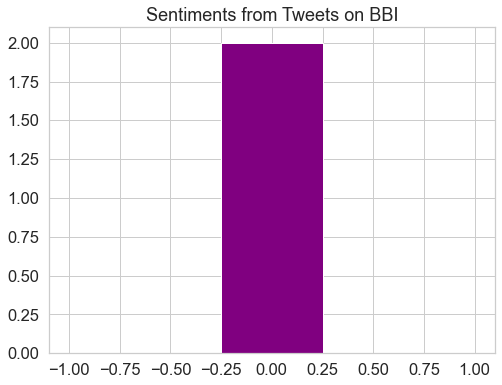

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on BBI")
plt.show()

In [17]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

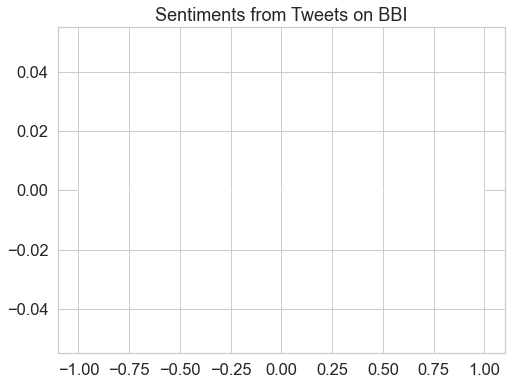

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on BBI")
plt.show()

In [19]:
from textblob import TextBlob

In [20]:
#calculate subjectivity,polarity and give it a score based on the threshold set

def sentiment_analysis(tweet):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 tweet[‘TextBlob_Subjectivity’] =    tweet[‘tweet’].apply(getSubjectivity)
 tweet [‘TextBlob_Polarity’] = tweet[‘tweet’].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return ‘Negative’
  elif score == 0:
    return ‘Neutral’
  else:
    return ‘Positive’
 tweet [‘TextBlob_Analysis’] = tweet  [‘TextBlob_Polarity’].apply(getAnalysis )
return tweet

SyntaxError: invalid character in identifier (<ipython-input-20-3b548d6c7553>, line 12)

In [ ]:
user=api.me() print (user.name)